In studying the Pymaceuticals' drug of interest Capomulin there were a few observations that stand out in the data.  The first observation is the tumor volume statistics, the drug Ramicane has the lowest statistics with Capomulin coming in second for tumor volume.  Between Capomulin and Ramicane the average tumor size then goes up by 12(mm3) for the next drug statistics.
The second observation is that Capomulin and Ramicane were the most utilized drugs amoung the mice.  This shows that between the two drugs they are the most efficent and therefore the most widely used within the test.
The third observation is that Capomulin and Ramicane stay withon the datasets quartiles.  Their tumor volumes fall between the lower and upper quartile.  Out of the other top 4 drugs we looked at Infubinol and Ceftamin do fall out of the upper quartile for the tumor volume.
The last observation is that with Capomulin it takes 6 to 8 days for the tumor volume to hit its lowest point. In comparison Ramicane hits its lowest tumor volume within 4 days.  Both Capomulin and Ramicane show they have a potential for growth again after hitting their lowest volume.
In conclusion Pymaceutical's drug of interest Capomulin shows signs of success.  There is a competition between Ramicane and Capomulin being the top two drugs. 

Obeservations and Insights

In [1]:
# Set up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"
# Read data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Mouse Data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Study Results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data
complete_data = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice
len(complete_data["Mouse ID"].unique())

249

In [5]:
# Find duplicates
dupes = complete_data['Mouse ID'].duplicated()
complete_data['Mouse ID'][dupes]
matches = complete_data['Timepoint'].isin(complete_data['Timepoint'])
complete_data['Mouse ID'][matches]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [6]:
# Clean DataFrame
individual_data = complete_data.drop_duplicates(subset=['Mouse ID'], keep='last')
individual_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [7]:
#Re-checking number of mice
len(individual_data["Mouse ID"].unique())

249

Summary Statistics

In [8]:
# Summary statistics using multiple series

tumor_mean = complete_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

tumor_median = complete_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

tumor_variance = complete_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

tumor_deviation = complete_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

tumor_SEM = complete_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

statistics_summary = pd.DataFrame(tumor_mean)
statistics_summary_df = statistics_summary.rename(columns={"Tumor Volume (mm3)": "Mean"})

statistics_summary_df["Median"] = tumor_median
statistics_summary_df["Variance"] = tumor_variance
statistics_summary_df["Deviation"] = tumor_deviation
statistics_summary_df["SEM"] = tumor_SEM

statistics_summary_df

,Mean,Median,Variance,Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Summary statisitics using groupby function
statistics_table = complete_data.groupby('Drug Regimen')
groupby_summary = statistics_table.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
groupby_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Finding Drug Datapoints for futue reference
drug_datapoints = complete_data.groupby(["Drug Regimen"]).count()['Tumor Volume (mm3)']
drug_datapoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

Bar Charts

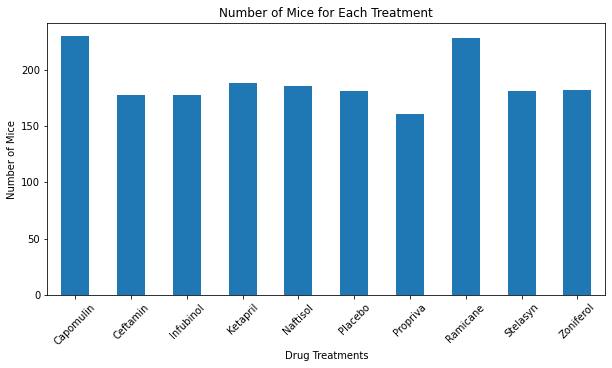

In [12]:
# Bar chart using pandas
drug_groups = complete_data.groupby('Drug Regimen')
treatments = drug_groups['Mouse ID'].count()

treatment_bar = treatments.plot(kind="bar", figsize=(10,5), rot=45, title="Number of Mice for Each Treatment")
treatment_bar.set_xlabel("Drug Treatments")
treatment_bar.set_ylabel("Number of Mice")

plt.savefig('pandas bar')
plt.show()

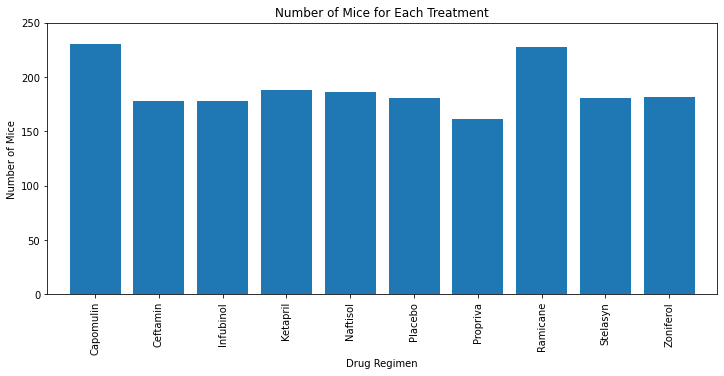

In [13]:
# Bar chart using pyplot
x_axis = np.arange(len(drug_groups))
tick_location = [x for x in x_axis]

plt.figure(figsize=(12,5))

treatment_bar_two = drug_datapoints.reset_index()
treatment_bar_two

plt.bar(x_axis, drug_datapoints, alpha=1, align="center")
plt.xticks(tick_location, treatment_bar_two['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(drug_groups)-.25)
plt.ylim(0,250)

plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.savefig('pyplot bar')
plt.show()

Pie Plot

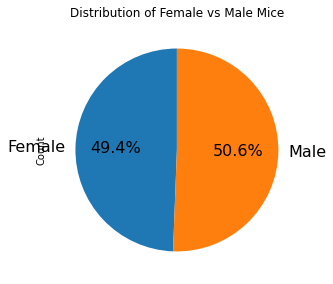

In [14]:
# Generate pie plot using pandas
gender_df = complete_data.groupby('Sex').count()
gender_df

gender_df = gender_df[["Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y="Count", ax=ax1, autopct='%.1f%%', startangle=90, shadow=False, legend = False, fontsize=16)
plt.title("Distribution of Female vs Male Mice")
plt.savefig('pandas pie')

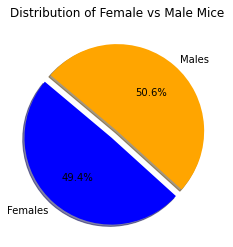

In [15]:
# Generate pie plot using pyplot
gender_count = (complete_data.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

labels = ["Females", "Males"]

colors = ["blue", "orange"]

explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Female vs Male Mice")
plt.savefig('pyplot pie')

Quartiles, Outliers and Boxplots

In [16]:
# Setting Up
cap_df = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin",:]
ram_df = complete_data.loc[complete_data["Drug Regimen"] == "Ramicane", :]
inf_df = complete_data.loc[complete_data["Drug Regimen"] == "Infubinol", :]
ceft_df = complete_data.loc[complete_data["Drug Regimen"] == "Ceftamin", :]

In [17]:
# Capomulin
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplast
caplastmerge = pd.merge(caplast, complete_data, on=("Mouse ID", "Timepoint"), how="left")
caplastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
# Ramicane
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlast
ramlastmerge = pd.merge(ramlast, complete_data, on=("Mouse ID", "Timepoint"), how="left")
ramlastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [19]:
# Infubinol
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflast
inflastmerge = pd.merge(inflast, complete_data, on=("Mouse ID", "Timepoint"), how="left")
inflastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
# Ceftamin
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlast
ceftlastmerge = pd.merge(ceftlast, complete_data, on=("Mouse ID", "Timepoint"), how="left")
ceftlastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [21]:
# Final tumor volume for each treatment
tumor = caplastmerge["Tumor Volume (mm3)"].sum()
tumor

ram_tumor = ramlastmerge["Tumor Volume (mm3)"].sum()
ram_tumor

inf_tumor = inflastmerge["Tumor Volume (mm3)"].sum()
inf_tumor

ceft_tumor = ceftlastmerge["Tumor Volume (mm3)"].sum()
ceft_tumor

print(f"The total tumor volume for Capomulin is: {tumor}")
print(f"The total tumor volume for Ramicane is: {ram_tumor}") 
print(f"The total tumor volume for Infubinol is: {inf_tumor}")   
print(f"The total tumor volume for Ceftamin is: {ceft_tumor}")         

The total tumor volume for Capomulin is: 916.68919298
The total tumor volume for Ramicane is: 904.78476071
The total tumor volume for Infubinol is: 1454.45614463
The total tumor volume for Ceftamin is: 1443.8494206300002


In [22]:
# Calculating Total Volume IQR
quartiles = complete_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")


The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 56.29220039
The interquartile range of tumor volume is: 11.292200389999998
The the median of tumor volume is: 48.95147442 


In [23]:
# Finding Total Volume Outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


In [24]:
# Each drugs quartiles
# Capomulin
tumor = caplastmerge["Tumor Volume (mm3)"]

quartiles_cap = tumor.quantile([.25,.5,.75])
lowerq_cap = quartiles[0.25]
upperq_cap = quartiles[0.75]
iqr_cap = upperq-lowerq

# Ramicane
ram_tumor = ramlastmerge["Tumor Volume (mm3)"]

quartiles_ram = ram_tumor.quantile([.25,.5,.75])
lowerq_ram = quartiles[0.25]
upperq_ram = quartiles[0.75]
iqr_ram = upperq-lowerq

# Infubinol
inf_tumor = inflastmerge["Tumor Volume (mm3)"]

quartiles_inf = inf_tumor.quantile([.25,.5,.75])
lowerq_inf = quartiles[0.25]
upperq_inf = quartiles[0.75]
iqr_inf = upperq-lowerq

# Ceftamin
ceft_tumor = ceftlastmerge["Tumor Volume (mm3)"]

quartiles_ceft = ceft_tumor.quantile([.25,.5,.75])
lowerq_ceft = quartiles[0.25]
upperq_ceft = quartiles[0.75]
iqr_ceft = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq_cap}")
print(f"The upper quartile of Capomulin is: {upperq_cap}")
print(f"The interquartile range of Capomulin is: {iqr_cap}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

print(f"The lower quartile of Ramicane is: {lowerq_ram}")
print(f"The upper quartile of Ramicane is: {upperq_ram}")
print(f"The interquartile range of Ramicane is: {iqr_ram}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

print(f"The lower quartile of Infubinol is: {lowerq_inf}")
print(f"The upper quartile of Infubinol is: {upperq_inf}")
print(f"The interquartile range of Infubinol is: {iqr_inf}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

print(f"The lower quartile of Ceftamin is: {lowerq_ceft}")
print(f"The upper quartile of Ceftaminn is: {upperq_ceft}")
print(f"The interquartile range of Ceftamin is: {iqr_ceft}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")


The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 56.29220039
The interquartile range of Capomulin is: 11.292200389999998
The the median of Capomulin is: 48.95147442 
The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 56.29220039
The interquartile range of Ramicane is: 11.292200389999998
The the median of Ramicane is: 48.95147442 
The lower quartile of Infubinol is: 45.0
The upper quartile of Infubinol is: 56.29220039
The interquartile range of Infubinol is: 11.292200389999998
The the median of Infubinol is: 48.95147442 
The lower quartile of Ceftamin is: 45.0
The upper quartile of Ceftaminn is: 56.29220039
The interquartile range of Ceftamin is: 11.292200389999998
The the median of Ceftamin is: 48.95147442 


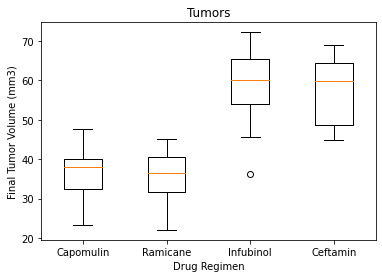

In [47]:
# Generate box plot
tumors_plot = [tumor, ram_tumor, inf_tumor, ceft_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumors_plot, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.savefig('boxplot')
plt.show()

Line and Scatter Plots

In [48]:
# Set up
capline_df = cap_df.loc[cap_df["Mouse ID"] == "b128",:]
capline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


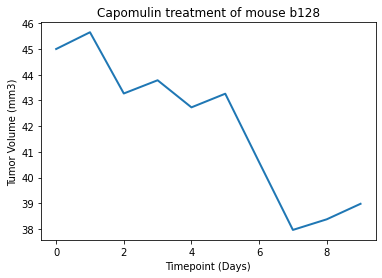

In [49]:
# Generate a line plot for mouse "b128"
x_axisTP = capline_df["Timepoint"]
tumor_size = capline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse b128')
plt.plot(x_axis, tumor_size,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

In [25]:
# Set up for Ramicane "a411"
ramline_df = ram_df.loc[ram_df["Mouse ID"] == "a411",:]
ramline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
318,a411,Ramicane,Male,3,22,0,45.000000,0
319,a411,Ramicane,Male,3,22,5,45.466677,0
320,a411,Ramicane,Male,3,22,10,40.759788,1
321,a411,Ramicane,Male,3,22,15,41.484169,1
322,a411,Ramicane,Male,3,22,20,38.087373,1


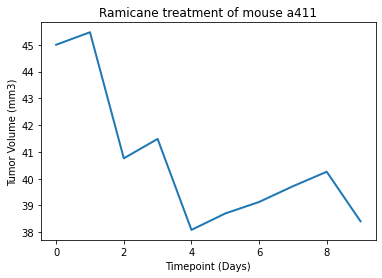

In [26]:
# Generate a line plot for mouse "a411"
x_axisTP = ramline_df["Timepoint"]
tumor_size = ramline_df["Tumor Volume (mm3)"]

plt.title('Ramicane treatment of mouse a411')
plt.plot(x_axis, tumor_size,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

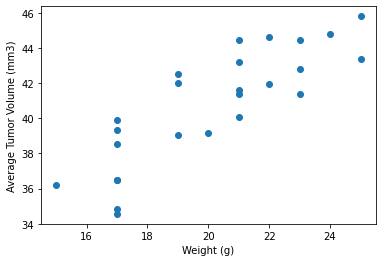

In [50]:
# Generate a scatter plot for mouse "b128"
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

Correlation and Regression

In [34]:
# Calculate correlation coefficent and linear regression model
corr=round(st.pearsonr(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [35]:
model = st.linregress(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [36]:
#capavg Weight(g)
mslope = 1.750468228958504
bintercept = 1.4481469525549002

<function matplotlib.pyplot.show(*args, **kw)>

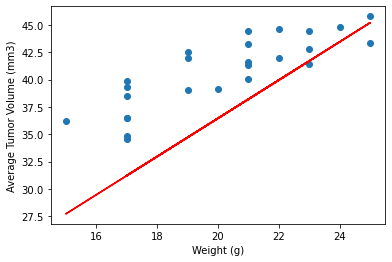

In [37]:
from scipy.stats import linregress
x_values = capavg['Tumor Volume (mm3)']
y_values = capavg['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(34,16),fontsize=30,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
